In [275]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [276]:
iris = datasets.load_iris()

In [277]:
samples = iris.data

In [278]:
x = samples[:, 0]
y = samples[:, 1]

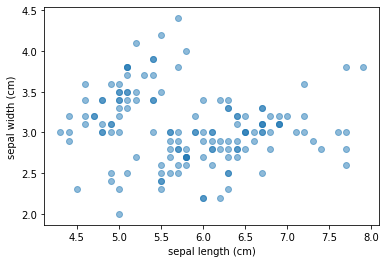

In [279]:
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## STEP 1: Place `K` Random Centroids

In [280]:
k = 3
# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
np.random.seed(10)
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))
display(centroids)

array([[7.07675432, 3.79712932],
       [4.37470702, 3.19641683],
       [6.58113365, 2.53951195]])

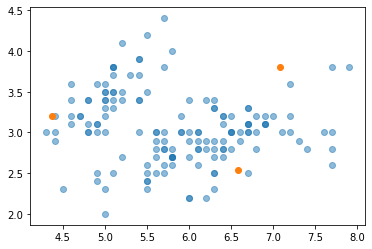

In [281]:
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

## Assign Datas to Nearest Centroid

In [282]:
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5

In [283]:
distance([0, 0], [1, 1])

1.4142135623730951

In [284]:
# 각 데이터 포인트를 그룹화 할 labels을 생성합니다 (0, 1, 또는 2)
sepal_length_width = np.array(list(zip(x, y)))
labels = np.zeros(len(samples))
# 각 데이터를 순회하면서 centroids와의 거리를 측정합니다
for i in range(len(samples)):
    distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
        labels[i] = cluster

In [285]:
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 2. 2. 2. 2. 2.]


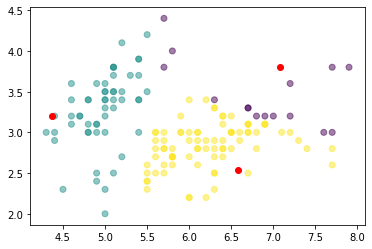

In [286]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

## STEP 3: Update Centroids

In [287]:
from copy import deepcopy
centroids_old = deepcopy(centroids)

In [288]:
for i in range(k):
  # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
  points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
  # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
  centroids[i] = np.mean(points, axis=0)
    
display(centroids_old)
display(centroids)


array([[7.07675432, 3.79712932],
       [4.37470702, 3.19641683],
       [6.58113365, 2.53951195]])

array([[6.86      , 3.48      ],
       [4.97407407, 3.27037037],
       [6.2345679 , 2.83703704]])

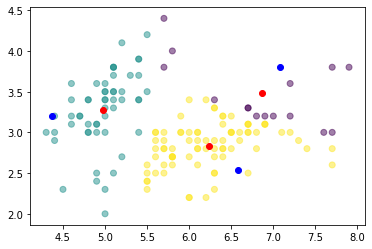

In [289]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## STEP 4: Repeat 2 ~ 3 Until Convergence

In [290]:
centroids_old = np.zeros(centroids.shape)	# 제일 처음 centroids_old는 0으로 초기화 해줍니다
labels = np.zeros(len(samples))
error = np.zeros(k)
# error 도 초기화 해줍니다
for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])
# STEP 4: error가 0에 수렴할 때 까지 2 ~ 3 단계를 반복합니다
while(error.all() != 0):
    # STEP 2: 가까운 centroids에 데이터를 할당합니다
    for i in range(len(samples)):
        distances = np.zeros(k)	# 초기 거리는 모두 0으로 초기화 해줍니다
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
        labels[i] = cluster
    # Step 3: centroids를 업데이트 시켜줍니다
    centroids_old = deepcopy(centroids)
    for i in range(k):
        # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
        points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
        # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
        centroids[i] = np.mean(points, axis=0)
    # 새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])
    print(error)
    

[0.41440077 0.05790819 0.16324392]
[0.04750016 0.         0.03507109]


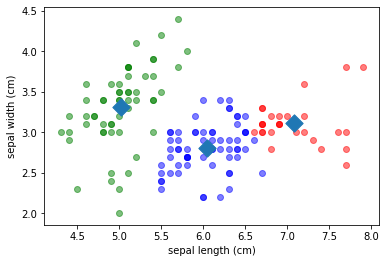

In [291]:
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Scikit-Learn

In [294]:
from sklearn.cluster import KMeans

In [296]:
model = KMeans(n_clusters=3)

In [297]:
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [298]:
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


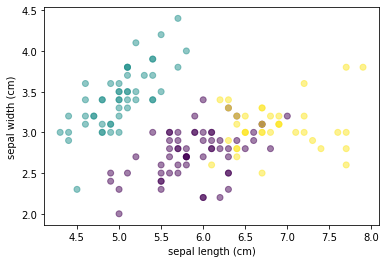

In [300]:
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Evaluation

### Cross Tabulation

In [315]:
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = 'setosa'
    elif target[i] == 1:
        species[i] = 'versicolor'
    elif target[i] == 2: 
        species[i] = 'virginica'

In [318]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


### Number of Clusters

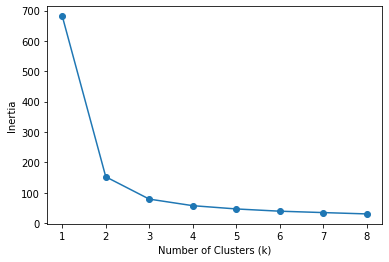

In [319]:
num_clusters = list(range(1, 9))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()


In [320]:
print(model.inertia_)

30.06459307359308
